In [4]:
# Import required libraries
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report

In [7]:
audio_path = 'C:\\Users\\dhiva\\Desktop\\eckovation dhivakar\\capstone\\music genre\\Data\\genres_original\\classical\\classical.00002.wav'
x , sr = librosa.load(audio_path)

In [8]:
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(661794,) 22050


In [9]:
y, sry = librosa.load(audio_path, sr=44100)
print(y.shape, sry)

(1323588,) 44100


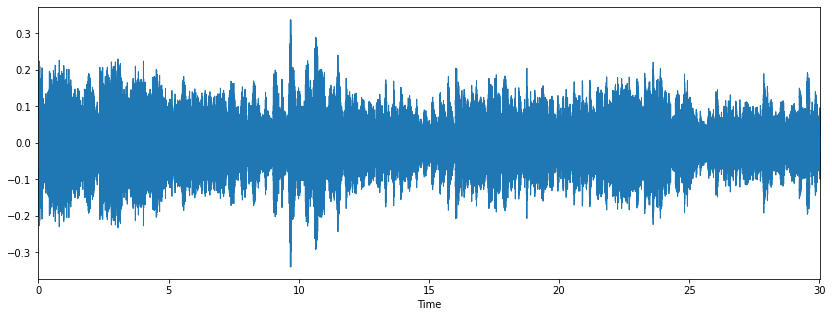

In [10]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
plt.show()

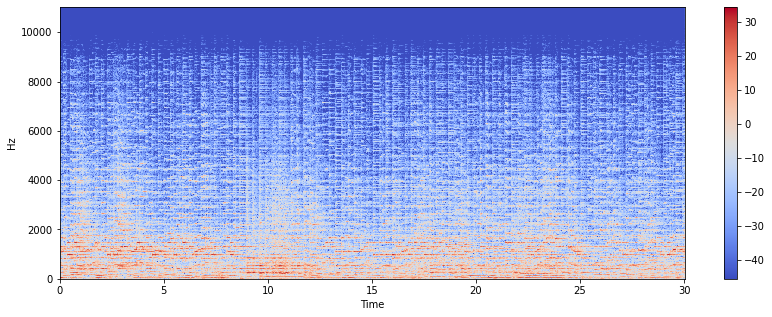

In [11]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

Extracting Audio features in csv file


In [14]:
header = 'filename chroma_stft spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1,21):
    header += f' mfcc_{i}'
header += ' label'
header = header.split()

In [15]:
file = open('data_new.csv', 'w', newline = '')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'Data/genres_original/{g}'):
        songname = 'Data/genres_original/'+g+'/'+filename
        y, sr = librosa.load(songname, mono = True, duration = 30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spectral_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spectral_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        spectral_ro = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y=y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(spectral_cent)} {np.mean(spectral_bw)} {np.mean(spectral_ro)} {np.mean(zcr)}'
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('data_new.csv', 'a', newline = '')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

KeyboardInterrupt: 

In [19]:
# data = pd.read_csv('data_new.csv')
data = pd.read_csv('features_30_sec.csv')
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [20]:
# Remove Filename and Length. Save to X and Y
data.pop('filename')
data.pop('length')
Y = pd.DataFrame(data.pop('label'))
X = data

In [21]:
X.head()


,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,...,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035
1,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,...,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282
2,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,...,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025
3,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,...,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339
4,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,...,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160


In [22]:
Y.head()


,label
0,blues
1,blues
2,blues
3,blues
4,blues


In [23]:
# Normalize the data
min_max = preprocessing.MinMaxScaler()
scaled_df = min_max.fit_transform(X.values)
final_df = pd.DataFrame(scaled_df,columns=X.columns)
final_df.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.362279,0.695468,0.318188,0.101983,0.314117,0.040233,0.422879,0.109789,0.385532,0.102567,...,0.564186,0.112704,0.541287,0.057615,0.422444,0.082450,0.487950,0.109503,0.599189,0.078255
1,0.343622,0.793392,0.230894,0.085580,0.248405,0.121475,0.436889,0.296867,0.353329,0.342717,...,0.570198,0.120353,0.574685,0.118286,0.448184,0.102997,0.548800,0.099081,0.579640,0.075947
2,0.389832,0.640692,0.433652,0.099064,0.254261,0.049046,0.325334,0.095712,0.289224,0.088981,...,0.622467,0.081898,0.331003,0.085962,0.370988,0.116420,0.453724,0.087317,0.501381,0.045405
3,0.473508,0.777954,0.345856,0.229160,0.129376,0.058253,0.267404,0.227566,0.181068,0.171001,...,0.565151,0.091876,0.484549,0.092509,0.460684,0.068975,0.538690,0.062612,0.468060,0.048168
4,0.277759,0.681062,0.219641,0.083075,0.327270,0.110761,0.325514,0.113536,0.357017,0.180228,...,0.383289,0.200462,0.410225,0.156424,0.403875,0.120300,0.424652,0.130173,0.233047,0.094836


In [26]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

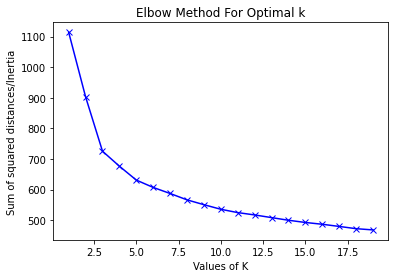

In [27]:
Sum_of_squared_distances = []
K = range(1,20)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(final_df)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

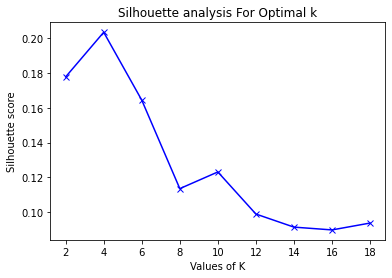

In [28]:
range_n_clusters = np.arange(2,20,2)
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(final_df)
    cluster_labels = kmeans.labels_
 
    # silhouette score
    silhouette_avg.append(silhouette_score(final_df, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

Modelling

In [29]:
# Convert Labels to one-Hot codes
cols = Y['label'].unique()
Y_encode = np.array(Y)
for i, item in enumerate(cols):
    ind = np.where(Y_encode == item)[0]
    Y_encode[ind] = i
Y_encode = pd.DataFrame(to_categorical(Y_encode))
Y_encode.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Split the Data into train and test
x_train, x_test, y_train, y_test = train_test_split(final_df, Y_encode, train_size = 0.9)
print('Length of x_train is : {}'.format(len(x_train)))
print('Length of y_train is : {}'.format(len(y_train)))
print('Length of x_test is : {}'.format(len(x_test)))
print('Length of y_test is : {}'.format(len(y_test)))

Length of x_train is : 900
Length of y_train is : 900
Length of x_test is : 100
Length of y_test is : 100


Fitting a Neural Network


In [31]:
# Build the regular model
model = keras.Sequential()
model.add(layers.Input(shape = (np.array(x_train).shape[1],)))
model.add(layers.Dense(256, activation="relu"))
# model.add(layers.Dropout(0.4))
# model.add(layers.Dense(512, activation="relu"))
# model.add(layers.Dropout(0.4))
# model.add(layers.Dense(512, activation="relu"))
# model.add(layers.Dropout(0.4))
model.add(layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               14848     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 17,418
Trainable params: 17,418
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [33]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=80, verbose = True)


Epoch 1/80
29/29 [==============================] - 0s 5ms/step - loss: 2.2060 - accuracy: 0.2356 - val_loss: 2.1089 - val_accuracy: 0.4200
Epoch 2/80
29/29 [==============================] - 0s 1ms/step - loss: 2.0062 - accuracy: 0.3556 - val_loss: 1.9230 - val_accuracy: 0.4100
Epoch 3/80
29/29 [==============================] - 0s 1ms/step - loss: 1.8204 - accuracy: 0.3922 - val_loss: 1.7644 - val_accuracy: 0.4300
Epoch 4/80
29/29 [==============================] - 0s 1ms/step - loss: 1.6753 - accuracy: 0.4556 - val_loss: 1.6629 - val_accuracy: 0.4700
Epoch 5/80
29/29 [==============================] - 0s 1ms/step - loss: 1.5531 - accuracy: 0.4956 - val_loss: 1.5693 - val_accuracy: 0.4600
Epoch 6/80
29/29 [==============================] - 0s 1ms/step - loss: 1.4648 - accuracy: 0.5022 - val_loss: 1.4637 - val_accuracy: 0.5500
Epoch 7/80
29/29 [==============================] - 0s 1ms/step - loss: 1.3969 - accuracy: 0.5322 - val_loss: 1.4726 - val_accuracy: 0.4900
Epoch 8/80
29/29 [==

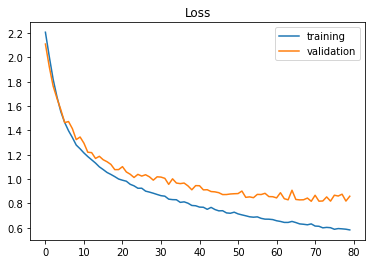

In [34]:
records = history.history
plt.plot(records['loss'], label="training")
plt.plot(records['val_loss'], label="validation")
plt.legend()
plt.title("Loss");

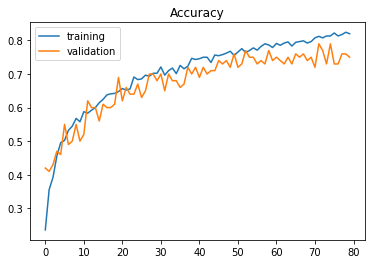

In [35]:
plt.plot(records['accuracy'], label="training")
plt.plot(records['val_accuracy'], label="validation")
plt.legend()
plt.title('Accuracy');

In [36]:
y_preds = np.round(model.predict(x_test))
y_preds[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [37]:
print(classification_report(y_test, np.array(y_preds), target_names = Y['label'].unique()))


              precision    recall  f1-score   support

       blues       0.50      0.71      0.59         7
   classical       1.00      0.89      0.94         9
     country       0.91      0.62      0.74        16
       disco       0.71      0.71      0.71         7
      hiphop       1.00      0.50      0.67        10
        jazz       1.00      0.92      0.96        13
       metal       0.91      0.91      0.91        11
         pop       1.00      0.86      0.92         7
      reggae       0.67      0.67      0.67         9
        rock       0.33      0.09      0.14        11

   micro avg       0.83      0.68      0.75       100
   macro avg       0.80      0.69      0.73       100
weighted avg       0.82      0.68      0.73       100
 samples avg       0.68      0.68      0.68       100



C:\Users\dhiva\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Using Random Forest Classifier


In [38]:
from sklearn.ensemble import RandomForestClassifier


In [39]:
cols_clf = Y['label'].unique()
Y_encode_clf = np.array(Y)
for i, item in enumerate(cols_clf):
    ind = np.where(Y_encode_clf == item)[0]
    Y_encode_clf[ind] = i
Y_encode_clf = Y_encode_clf.reshape(1,1000)[0]
Y_encode_clf[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object)

In [40]:
# Split the Data into train and test
x_train_clf, x_test_clf, y_train_clf, y_test_clf = train_test_split(final_df, Y, train_size = 0.9)
print('Length of x_train is : {}'.format(len(x_train_clf)))
print('Length of y_train is : {}'.format(len(y_train_clf)))
print('Length of x_test is : {}'.format(len(x_test_clf)))
print('Length of y_test is : {}'.format(len(y_test_clf)))

Length of x_train is : 900
Length of y_train is : 900
Length of x_test is : 100
Length of y_test is : 100


In [42]:
clf = RandomForestClassifier(n_estimators = 200, random_state = 22)
clf.fit(x_train_clf, y_train_clf)
preds = clf.predict(x_test_clf)
preds = preds.reshape((100,1))
print(f'Accuracy of the predictor is: {(preds == y_test_clf).sum()[0]}%')

C:\Users\dhiva\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy of the predictor is: 76%
